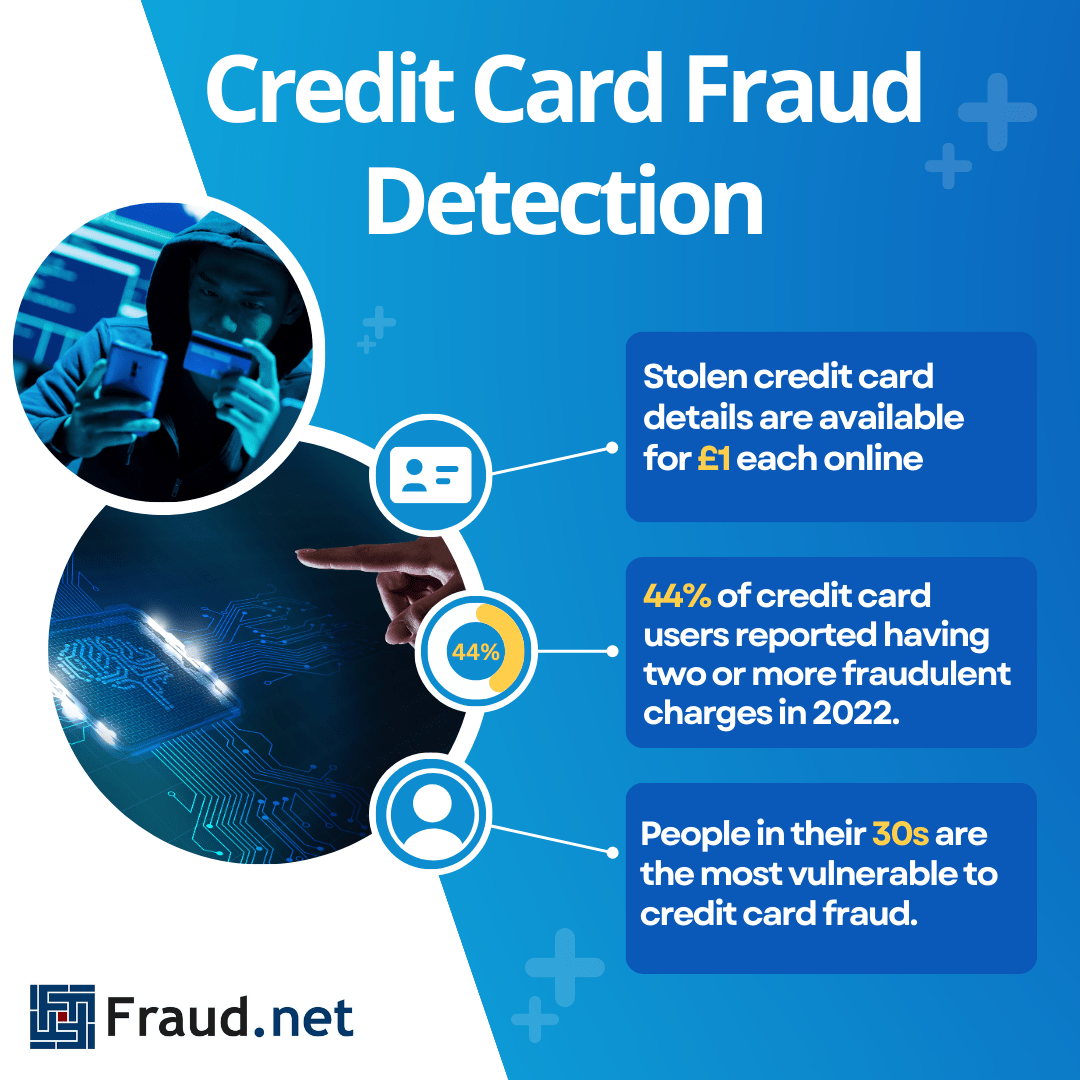

**CREDIT CARD FRAUD DETECTION**

**Import Libraries and Load Dataset**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Load the dataset
url = '/content/creditcard.csv'
df = pd.read_csv(url)
print("Dataset loaded successfully.")
print("First few rows of the dataset:")
print(df.head())


Dataset loaded successfully.
First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137

**Data Preprocessing and Normalization**

In [ ]:
# Data Preprocessing
print("Starting data preprocessing...")

# Normalize the 'Amount' feature
scaler = StandardScaler()
df['normalized_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop unnecessary columns
df = df.drop(['Time', 'Amount'], axis=1)

print("Data preprocessing completed.")
print("First few rows after preprocessing:")
print(df.head())


Starting data preprocessing...
Data preprocessing completed.
First few rows after preprocessing:
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.79

**Define Features and Target, Address Class Imbalance**

In [ ]:
# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Check for missing values in the target variable and handle them
print("Number of missing values in target variable:", y.isna().sum())
y = y.dropna()  # Drop rows with missing values in the target variable

# Update X to match the rows in y after dropping missing values
X = X.loc[y.index]

# Check class distribution
print("Class distribution before addressing imbalance:")
print(y.value_counts())

# Address class imbalance using SMOTE
print("Applying SMOTE to handle class imbalance...")
sm = SMOTE(random_state=42, k_neighbors=2) # Reduce k_neighbors to avoid the error
X_res, y_res = sm.fit_resample(X, y)  # Use the updated X and y

print("Class distribution after applying SMOTE:")
print(pd.Series(y_res).value_counts())

Number of missing values in target variable: 1
Class distribution before addressing imbalance:
Class
0.0    5844
1.0       3
Name: count, dtype: int64
Applying SMOTE to handle class imbalance...
Class distribution after applying SMOTE:
Class
0.0    5844
1.0    5844
Name: count, dtype: int64


**Split the Dataset into Training and Testing Subsets**

In [ ]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("Dataset split into training and testing subsets.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Dataset split into training and testing subsets.
Training set size: 9350
Testing set size: 2338


**Train a Logistic Regression Model**

In [ ]:
# Train a Logistic Regression model
print("Training Logistic Regression model...")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the Logistic Regression model
print("Evaluating Logistic Regression model...")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Training Logistic Regression model...
Evaluating Logistic Regression model...
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1187
         1.0       1.00      1.00      1.00      1151

    accuracy                           1.00      2338
   macro avg       1.00      1.00      1.00      2338
weighted avg       1.00      1.00      1.00      2338

Confusion Matrix:
[[1185    2]
 [   0 1151]]


**Train a Random Forest Model**

In [ ]:
# Train a Random Forest model
print("Training Random Forest model...")
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("Evaluating Random Forest model...")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Training Random Forest model...
Evaluating Random Forest model...
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1187
         1.0       1.00      1.00      1.00      1151

    accuracy                           1.00      2338
   macro avg       1.00      1.00      1.00      2338
weighted avg       1.00      1.00      1.00      2338

Confusion Matrix:
[[1187    0]
 [   0 1151]]


 **Conclusion and Further Steps**

In [ ]:
# Summary and Conclusion
print("Model training and evaluation completed.")
print("Next steps could include further feature engineering, exploring additional models, or deploying the best model to a production environment.")


Model training and evaluation completed.
Next steps could include further feature engineering, exploring additional models, or deploying the best model to a production environment.
